       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

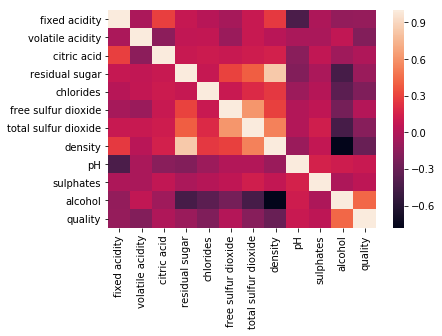

In [20]:
import timeit
start = timeit.default_timer()

#Your ops here

 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("winequality-white.csv", sep=";")
print(df.describe())
df.info()
corr = df.corr()
print(corr)
sns.heatmap(corr)

std = MinMaxScaler()

df = pd.DataFrame(std.fit_transform(df), columns = df.columns)

X = df.drop(["quality"],axis=1)
Y = df["quality"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


#perform a Grid search
param_grid = {'C': [0.1,1, 10, 100], 
              'epsilon': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

#grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,Y_train)

#print(grid.best_estimator_)
svm_poly_reg = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svm_poly_reg.fit(X_train,Y_train)
#X_pred = np.array([[0,0,1,1,1,0,13,0,7,2]])
prediction = svm_poly_reg.predict(X_test)
#print(prediction)

accuracy = svm_poly_reg.score(X_test,Y_test)
print(accuracy)


#end = timeit.default_timer()
#print(end-start)

In [12]:
import timeit
start = timeit.default_timer()

#Your ops here

 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import cross_validation, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("breast-cancer-wisconsin.csv")


print(df.info)
stdscale = StandardScaler()


X = df.drop(["class"], axis =1)
Y = df["class"]

<bound method DataFrame.info of           id  clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0    1000025                5               1                1              1   
1    1002945                5               4                4              5   
2    1015425                3               1                1              1   
3    1016277                6               8                8              1   
4    1017023                4               1                1              3   
..       ...              ...             ...              ...            ...   
694   776715                3               1                1              1   
695   841769                2               1                1              1   
696   888820                5              10               10              3   
697   897471                4               8                6              4   
698   897471                4               8                8              5